In [1]:
# Lets import some dependencies first
import warnings
warnings.filterwarnings("ignore")


import numpy as np
import pandas as pd
import seaborn as sns

from matplotlib import pyplot as plt
%config InlineBackend.figure_format = 'retina'
plt.style.use('ggplot')

from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import StratifiedKFold,train_test_split
from sklearn.model_selection import GridSearchCV,cross_val_score

pd.set_option("display.precision",2)
pd.set_option("display.max_columns",None)

from sklearn.metrics import roc_auc_score
import pickle

In [2]:
# loading the dataset
df = pd.read_pickle('./pickled/Train_set_scaled')

In [3]:
df.head(10)

,index,ID,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Marital Status_Divorced,Marital Status_Married,Marital Status_Single,Marital Status_Together,Marital Status_Widow,Year_Birth,Education,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Z_CostContact,Z_Revenue
0,1998,5370,1,0,0,0,0,0,0,0.0,1.0,0.0,0.0,0.0,0.34,1.61,-0.88,1.02,-0.93,0.75,-0.38,-0.19,-0.59,-0.10,-0.69,-0.49,-0.41,0.88,1.07,-0.57,0.06,1.11,0.0,0.0
1,814,6303,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,1.46,1.61,1.87,-0.82,-0.93,-0.57,0.79,0.33,1.18,2.61,0.71,3.27,-0.27,-1.22,0.34,0.80,1.92,-1.78,0.0,0.0
2,1513,9264,0,0,0,0,0,0,0,0.0,1.0,0.0,0.0,0.0,1.46,-0.78,1.29,-0.82,-0.93,-1.23,-1.66,0.36,0.40,2.43,0.66,4.15,2.92,-0.70,-0.03,1.82,0.99,-1.37,0.0,0.0
3,1381,7514,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,-1.11,0.81,0.12,1.02,0.92,0.54,0.86,-0.66,-0.41,-0.58,-0.48,-0.41,-0.31,0.88,-0.39,-0.57,-0.55,0.28,0.0,0.0
4,919,4637,0,0,0,1,0,0,0,0.0,0.0,1.0,0.0,0.0,-1.29,1.61,1.07,-0.82,-0.93,0.23,0.83,1.98,0.95,1.34,2.00,-0.66,-0.54,-0.70,0.70,2.16,0.99,-0.96,0.0,0.0
5,902,6445,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,-0.17,-0.78,0.70,-0.82,-0.93,-0.01,0.83,-0.18,1.89,1.08,-0.15,0.32,-0.08,-0.70,-0.03,0.80,0.06,-1.37,0.0,0.0
6,1205,1118,1,0,0,0,0,0,0,0.0,1.0,0.0,0.0,0.0,-1.11,0.02,-0.03,-0.82,0.92,0.60,1.31,0.73,-0.33,-0.36,-0.54,-0.51,-0.29,0.35,2.16,0.46,-0.24,1.11,0.0,0.0
7,173,1880,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,-0.86,1.61,0.09,1.02,0.92,-0.86,-1.11,-0.67,-0.66,-0.71,-0.69,-0.66,-0.73,-0.17,-0.76,-0.57,-0.86,-0.13,0.0,0.0
8,1557,4037,0,0,0,0,0,0,0,1.0,0.0,0.0,0.0,0.0,0.60,-0.78,-0.92,1.02,-0.93,0.12,0.97,-0.90,-0.64,-0.72,-0.54,-0.66,-0.75,-0.70,-1.12,-0.91,-1.17,0.69,0.0,0.0
9,1216,232,0,0,0,0,0,0,0,0.0,0.0,1.0,0.0,0.0,-0.34,-0.78,0.46,-0.82,0.92,-0.02,-1.42,-0.07,1.44,-0.34,-0.10,-0.32,-0.20,-0.70,-0.03,-0.22,1.30,-0.96,0.0,0.0


Lets seperate Train Test(Validation) Set

In [4]:
df['Target'] = df['AcceptedCmp1']+df['AcceptedCmp2']+df['AcceptedCmp3'] + \
    df['AcceptedCmp4']+df['AcceptedCmp5']+df['Response']

In [5]:
df['Target'].replace(
    df[df['Target']>0]['Target'].values.tolist(),
    1,
    inplace = True
)

In [6]:
df.Target.value_counts()

0    1302
1     468
Name: Target, dtype: int64

Lets define our X and y

In [7]:
df.columns

Index(['index', 'ID', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response',
       'Marital Status_Divorced', 'Marital Status_Married',
       'Marital Status_Single', 'Marital Status_Together',
       'Marital Status_Widow', 'Year_Birth', 'Education', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Z_CostContact', 'Z_Revenue', 'Target'],
      dtype='object')

In [8]:
X = df.drop(columns=['index', 'ID', 'AcceptedCmp1', 'AcceptedCmp2',
                     'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response', 'Target'])
y = df['Target']

In [9]:
X.shape,y.shape

((1770, 26), (1770,))

Lets make Train,Test(Validation) Split

In [10]:
X_train, X_test, y_train, y_valid = train_test_split(
    X, y, test_size=0.25, random_state=42
)

In [11]:
X_train.shape , y_valid.shape

((1327, 26), (443,))

I'm gonna use SKF to preserve the class distribution while cross validation

In [12]:
skf = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)

Initialize the Decision Tree

In [13]:
Dtree = DecisionTreeClassifier(random_state=42)

In [14]:
Dtree.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

In [15]:
cross_val_score(Dtree,X,y,cv=skf,scoring='roc_auc').mean()

0.6634689156750312

In [16]:
# accuracy on the test set
Dtree_pred = Dtree.predict(X_test)
roc_auc_score(y_valid,Dtree_pred)

0.6539772429342982

No tuning on hyperparameter! Score 66! Also no overfitting! Good sign!

***Important Note:***:
- I have tested on the nonscaled dataset too. The test set accuracy was 64. And with scaled its 65! Thus overfitting is slightly reduced using Scaled Features!

### Model Evaluation

In [17]:
from sklearn.metrics import classification_report
print(f"ROC-AUC Score: {roc_auc_score(y_valid,Dtree_pred)}")
print(classification_report(y_valid, y_pred=Dtree_pred))

ROC-AUC Score: 0.6539772429342982
              precision    recall  f1-score   support

           0       0.82      0.80      0.81       326
           1       0.48      0.50      0.49       117

    accuracy                           0.72       443
   macro avg       0.65      0.65      0.65       443
weighted avg       0.73      0.72      0.73       443



Plotting Confusion Matrix

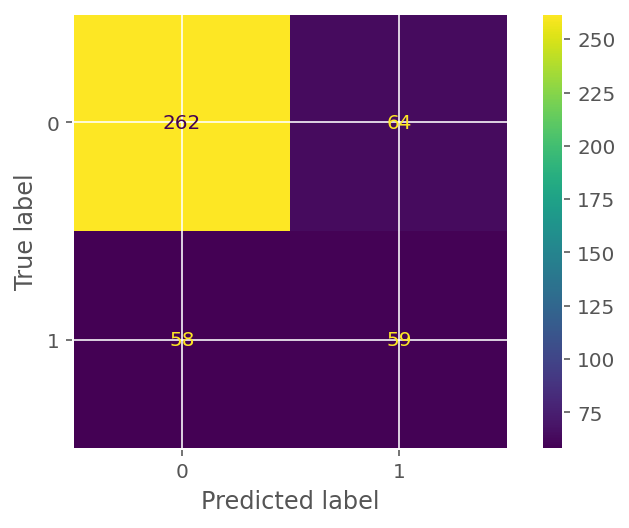

In [18]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_valid,Dtree_pred,labels=Dtree.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=Dtree.classes_)
disp.plot()
plt.show()